In [1]:
import numpy as np        
import matplotlib.pyplot as plt

## Task 1

**[5 points]** Create a diagonal (5 \times 5) matrix with diagonal elements 1, 2, 3, 4, and 5.

* Find its trace using library functions.
* Find its inverse matrix.


In [8]:
matrix = np.array([[1,0,0,0,0],[0,2,0,0,0],[0,0,3,0,0],[0,0,0,4,0],[0,0,0,0,5]]) 
 
print(matrix)
 
matrix_trace = np.trace(matrix) 
print(f"matrix_trace: {matrix_trace}\n")

inverse_matrix = np.linalg.inv(matrix) 
print(f"inverse_matrix:\n{inverse_matrix}")


[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
matrix_trace: 15

inverse_matrix:
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


**[5 points]** Generate a random (4 \times 5) matrix (X).

* Find the determinant of the (2\times2) submatrix of (X) formed by rows 2 and 3 and columns 1 and 2; assume rows and columns are numbered starting from one (use slicing!). This determinant is called a **minor** of (X).
* Compute the product (X^{\mathsf T}X), its determinant, and its trace.

In [3]:
random_matrix = np.random.randint(1, 10, size=(4,5))

print(f"Random matrix X:\n{random_matrix}")

sub_matrix = random_matrix[1:3, 0:2]  
print(f"Determinant of the submatrix: {np.linalg.det(sub_matrix)}\n") 

transposed_matrix = random_matrix.transpose() 
result = np.matmul(transposed_matrix, random_matrix) 
print(f"Product X^TX:\n{result}")

determinant = np.linalg.det(result)  
print(f"Determinant: {determinant}\n")

trace = np.trace(result) 
print(f"Trace: {trace}\n")

Random matrix X:
[[8 5 6 6 7]
 [1 2 8 5 9]
 [2 8 1 5 3]
 [8 9 2 1 6]]
Determinant of the submatrix: 4.0

Product X^TX:
[[133 130  74  71 119]
 [130 174  72  89 131]
 [ 74  72 105  83 129]
 [ 71  89  83  87 108]
 [119 131 129 108 175]]
Determinant: 8.2495763251178e-08

Trace: 674



**[5 points]** Write a function `prod_and_sq_sum(A)` that computes the product and the sum of the squares of the diagonal elements of a square matrix `A`.

In [9]:
A = [[0, 2, 3], [1, 2, 4], [0, 0, 5]] 
 
def prod_and_sq_sum(A):
    A = np.array(A)
    diagonal_elements = np.diagonal(A) 

    product_of_squares = np.prod(np.square(diagonal_elements)) 
    sum_of_squares = np.sum(np.square(diagonal_elements)) #

    return product_of_squares, sum_of_squares

prod_and_sq_sum = prod_and_sq_sum(A)
prod_and_sq_sum

(0, 29)

**[5 points]** For matrices `A` and `B` of size (m \times n), let (a_1,\ldots,a_n) and (b_1,\ldots,b_n) denote their columns, respectively. Write a function `f(A, B, k)` that computes

[
\sum_{i=1}^{\min(k, n)} a_i b_i^{\mathsf T}.
]


In [5]:
#k<n
A = np.array([[1, 2, 3, 4], [4, 2, 3, 2], [1, 0, 2, 3], [2,3,1, 0]])
B = np.array([[2, 0, 1, 0], [1, 2, 2, 1], [2, 1, 0, 4], [3, 1, 4, 1]])
k = 2

def f(A, B, k):
    k = min(k, A.shape[1])  
    A = A[:, :k] 
    B = B[:, :k] 
    B = B.transpose() 

    result = A.dot(B) 
    return result

result = f(A, B, k)
result

array([[ 2,  5,  4,  5],
       [ 8,  8, 10, 14],
       [ 2,  1,  2,  3],
       [ 4,  8,  7,  9]])

In [6]:
# k>n
A = np.array([[1, 2, 3, 4], [4, 2, 3, 2], [1, 0, 2, 3], [2, 3, 1, 0]])
B = np.array([[2, 0, 1, 0], [1, 2, 2, 1], [2, 1, 0, 4], [3, 1, 4, 1]])
k = 10

def f(A, B, k):
    k = min(k, A.shape[1])  
    A = A[:, :k]
    B = B[:, :k]
    B = B.transpose()

    result = A.dot(B)
    return result

result = f(A, B, k)
result

array([[ 5, 15, 20, 21],
       [11, 16, 18, 28],
       [ 4,  8, 14, 14],
       [ 5, 10,  7, 13]])

**[5 points]** Write a function `get_diag(A, B)` that takes two square matrices `A` and `B` of the same size and returns the vector of diagonal elements of the product `AB` **without computing the full product**.


In [7]:
A = np.array([[1, 2, 3], [4, 2, 3], [1, 0, 2]])
B = np.array([[2, 0, 1], [1, 2, 2], [2, 1, 0]])

def get_diag(A, B):
    result = np.einsum('ij,ji->i', A, B) 
    return result
result = get_diag(A, B)
print(result)


[10  7  1]


## Problem 2

Suppose our sample contains (10{,}000) astronaut candidates. Only (10) of them will pass all tests and start training. Selection into the astronaut corps depends (95%) on a candidate’s skill and (5%) on their luck. Skill and luck are independent.

**a) [5 points]** Generate each candidate’s skill from a uniform distribution on ([0,1]). Similarly, generate each candidate’s luck. Compute the final score used for selection by
[
\text{score} = 0.95 \cdot \text{skill} + 0.05 \cdot \text{luck}.
]
Repeat this simulation (10^4) times. Estimate the average luck of those who became astronauts. Plot a histogram of the distribution of luck among those who became astronauts.

Average luck among astronauts: 0.9326307413920525


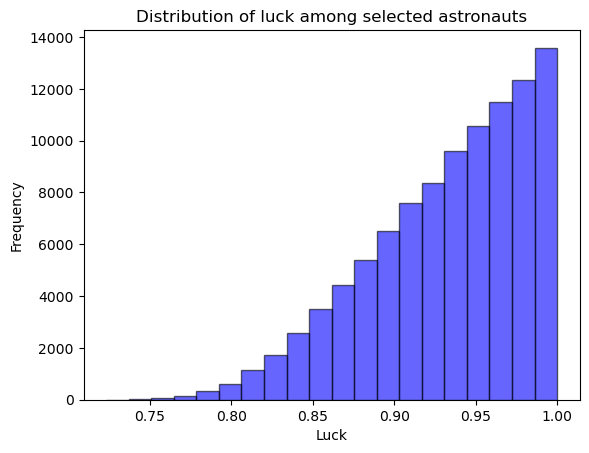

In [12]:
num_candidates = 10**4
num_simulations = 10**4

skills = np.random.uniform(0, 1, (num_simulations, num_candidates))  # generate skills from a uniform distribution for all 10k candidates and 10k simulations
luck = np.random.uniform(0, 1, (num_simulations, num_candidates))    # same generation for luck

score = 0.95 * skills + 0.05 * luck  # compute the final score

# took the idea from ChatGPT — this picks the 10 candidates with the highest scores in each simulation
selected = np.argsort(score, axis=1)[:, -10:]
# take the luck values for the candidates selected in the previous line
luck_values = luck[np.arange(num_simulations)[:, None], selected]

average_luck_value = np.mean(luck_values)
luck_values = luck_values.flatten()
print(f"Average luck among astronauts: {average_luck_value}")

plt.hist(luck_values, bins=20, edgecolor='black', color='blue', alpha=0.6)
plt.title('Distribution of luck among selected astronauts')
plt.xlabel('Luck')
plt.ylabel('Frequency')
plt.show()

**b) [5 points]** Select astronauts based solely on their `skill`. Using simulations, estimate on average how many people from the top candidates by `skill` overlap with the top candidates by `score`.


In [15]:
selected_scores = np.argsort(score, axis=1)[:, -10:]  
selected_skills = np.argsort(skills, axis=1)[:, -10:]  

intersection_count = np.mean([len(np.intersect1d(skill_top, score_top)) for skill_top, score_top in zip(selected_skills, selected_scores)])
intersection_count

1.8237

__в) [5 баллов]__ А что будет, если мы будем отбирать больше космонавтов? 

Для каждого $n$ от $10$ до $500$ с шагом в $10$ сделайте процедуру отбора в космонавты топ-$n$ кандидатов по `skill` и по `score`. Посчитайте, на сколько в среднем процентов отличаются эти топы. Изобразите получившуюсья зависимость на графике. По оси абсцисс отложите $n$, по оси ординат процент пересечения.

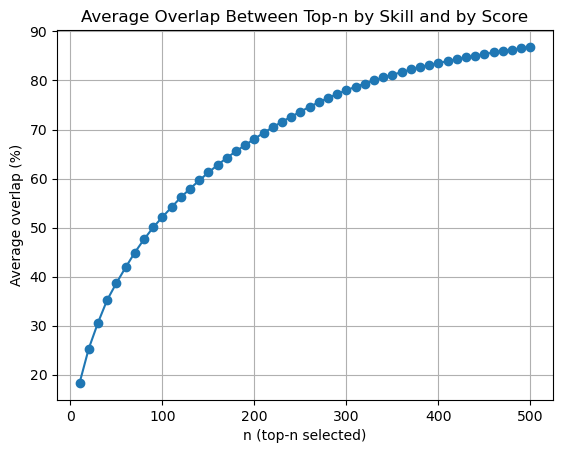

In [17]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)

num_candidates = 10_000
num_sims = 1_000
n_values = np.arange(10, 501, 10)
max_n = n_values.max()
batch_size = 50

overlap_sum = np.zeros_like(n_values, dtype=float)

def top_n_indices(values_row, n):
    """Return indices of the top-n elements of a 1D array (descending)."""
    idx = np.argpartition(values_row, -n)[-n:]
    order = np.argsort(-values_row[idx], kind="mergesort")
    return idx[order]

num_batches = num_sims // batch_size
leftover = num_sims % batch_size

for b in range(num_batches + (1 if leftover else 0)):
    cur = leftover if (b == num_batches and leftover) else batch_size

    # Generate skill and luck for the current batch
    skill = rng.random((cur, num_candidates))
    luck  = rng.random((cur, num_candidates))
    score = 0.95 * skill + 0.05 * luck

    for i in range(cur):
        top_skill_500 = top_n_indices(skill[i], max_n)
        top_score_500 = top_n_indices(score[i], max_n)

        for j, n in enumerate(n_values):
            A = top_skill_500[:n]
            B = top_score_500[:n]
            inter = np.intersect1d(A, B, assume_unique=False).size
            overlap_sum[j] += (inter / n) * 100.0

avg_overlap_pct = overlap_sum / num_sims

plt.figure()
plt.plot(n_values, avg_overlap_pct, marker='o')
plt.xlabel('n (top-n selected)')
plt.ylabel('Average overlap (%)')
plt.title('Average Overlap Between Top-n by Skill and by Score')
plt.grid(True)
plt.show()


**g) [5 points]** Draw conclusions from your calculations.

**Answer:**

Conclusions:

* The **average luck** among those who became astronauts turned out to be slightly above **0.9**. This suggests that **luck plays an important role** in success!

  *Just like in real life: you can work hard on your data analysis homework, but in the end, you still need some luck so that the grader is in a good mood. Luckily, mine is kind and fair — I guess my luck score is high! (Hopefully, I’ll get an extra point for all my silly jokes.)*

* The simulations showed that the **average overlap between the top candidates by skill and by score** is around **18%**. So again — without luck, you can’t go far; even a small weight can have a big impact.

* The analysis of how the **percentage overlap** changes with the number of selected candidates showed that as the number of astronauts increases, the overlap percentage **also increases** — meaning skill and score align more when more people are chosen.

**d) [4 points]** Yura wants to become an astronaut. He has quite strong skills — he is among the **top 1%** of candidates, with `score = 0.99` (Yura boosted his skills to 0.99 and doesn’t rely on luck at all). What is the **probability** that Yura will become an astronaut?


In [18]:
yura_score = 0.99 

selected_scores = np.argsort(score, axis=1)[:, -10:]

successful_simulations = np.sum(yura_score > selected_scores)  
probability_of_selection = successful_simulations / num_simulations

probability_of_selection

0.0

**e) [1 point]** Yura keeps trying again and again. On average, how many attempts does he need to make before his first success?

**Hint:** There’s no need to simulate anything here — just recall the **geometric distribution** and its **expected value**.

In [20]:
average_attempts = 1/probability_of_selection
average_attempts

/var/folders/yz/k611_24n6wz3f2wbn48nk7xh0000gn/T/ipykernel_42823/660101952.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  average_attempts = 1/probability_of_selection


inf

## Problem 3

Ryan Gosling, Steve Rogers, and the band Radiohead are riding an elevator.

The building has 30 floors plus a lobby (floor zero). There is only one elevator and it moves very slowly. It stops at every floor on the way up and then at every floor on the way down. Moving between floors and waiting for passengers takes one minute. If the elevator starts from the ground floor at 8:00 AM, it reaches the 30th floor at 8:30 AM and returns to the 1st floor by 9:00 AM.

Run (10^4) experiments and use them to answer the following questions:

**a) [5 points]** Ryan Gosling arrives at the elevator on the 3rd floor at a random time and waits for it. Estimate the probability that the elevator will arrive to Ryan **from above**.

In [21]:
def lift_simulation():
    arrival_time = np.random.uniform(0, 60)  
    lift_start = np.random.uniform(0, 60)    
    ryan_floor = 3                           
    
    time_difference = np.abs(arrival_time - lift_start)  

    if time_difference > ryan_floor: 
        return True
    else:
        return np.random.choice([True, False]) 

experiments = 10**4 
above = np.sum([lift_simulation() for i in range(experiments)]) 

probability = above / experiments 
probability

0.9511

**b) [5 points]** The band Radiohead arrives at the elevator on the 25th floor at a random time and waits for it. Estimate the probability that the elevator will arrive to Radiohead **from above**.

In [22]:
def lift_simulation():
    arrival_time = np.random.uniform(0, 60)  
    lift_start = np.random.uniform(0, 60)    
    radiohead_floor = 25
    
    time_difference = np.abs(arrival_time - lift_start)

    if time_difference > radiohead_floor:    
        return True
    else:
        return np.random.choice([True, False]) 

experiments = 10**4
above = np.sum([lift_simulation() for i in range(experiments)])

probability = above / experiments
probability

0.67

**c) [5 points]** Plot histograms of the elevator waiting times for Ryan Gosling and the band Radiohead. Do the distributions visually resemble normal ones? How different are they from each other?

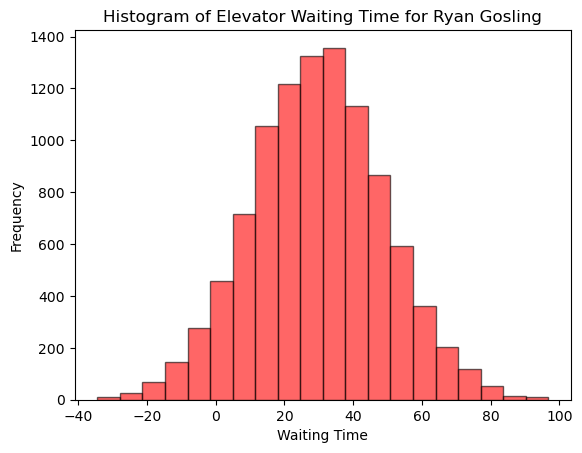

In [23]:
floors = 30               
time_between_floors = 1    

total_time = (floors * 2) * time_between_floors 
mean_waiting_time = total_time / 2              
standard_deviation = np.sqrt((30**2 + total_time**2) / 12)    

waiting_time_random = np.random.normal(mean_waiting_time, standard_deviation, 10**4) 
                                      

plt.hist(waiting_time_random, bins=20, edgecolor='black', color='red', alpha=0.6)  #
plt.title('Histogram of Elevator Waiting Time for Ryan Gosling')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.show()

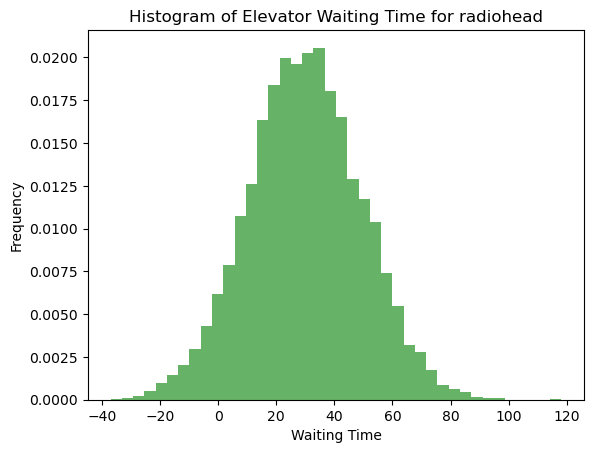

In [24]:
floors = 30                 
time_between_floors = 1     

total_time = (floors * 2) * time_between_floors
mean_waiting_time = total_time / 2               
standard_deviation = np.sqrt((30**2 + total_time**2) / 12)    

waiting_time_random = np.random.normal(mean_waiting_time, standard_deviation, 10**4)  

plt.hist(waiting_time_random, bins=40, density=True, alpha=0.6, color='green')
plt.title('Histogram of Elevator Waiting Time for radiohead')
plt.xlabel('Waiting Time')
plt.ylabel('Frequency')
plt.show()

***Conclusion***

In this code, a normal distribution is used for the elevator waiting times because the waiting time on each floor is assumed to be independent and identically distributed. Considering the **Central Limit Theorem (CLT)**, which states that sample means tend toward a normal distribution, using a normal approximation for waiting times on each floor simplifies our task. Moreover, this assumption doesn’t depend on which floor the elevator is being waited for—hence the identical code structure.

*In reality, this approach isn’t strongly recommended, but since we have no external factors here — **why not**?*

**d) [5 points]** Steve Rogers has plenty of free time and rides the elevator all day. Draw two plots for Steve:

* On the first plot, put the floor from which Steve starts on the x-axis and the estimated probability that the elevator arrives **from above** on the y-axis.
* On the second plot, put the floor from which Steve starts on the x-axis and the **average waiting time** for the elevator on the y-axis.

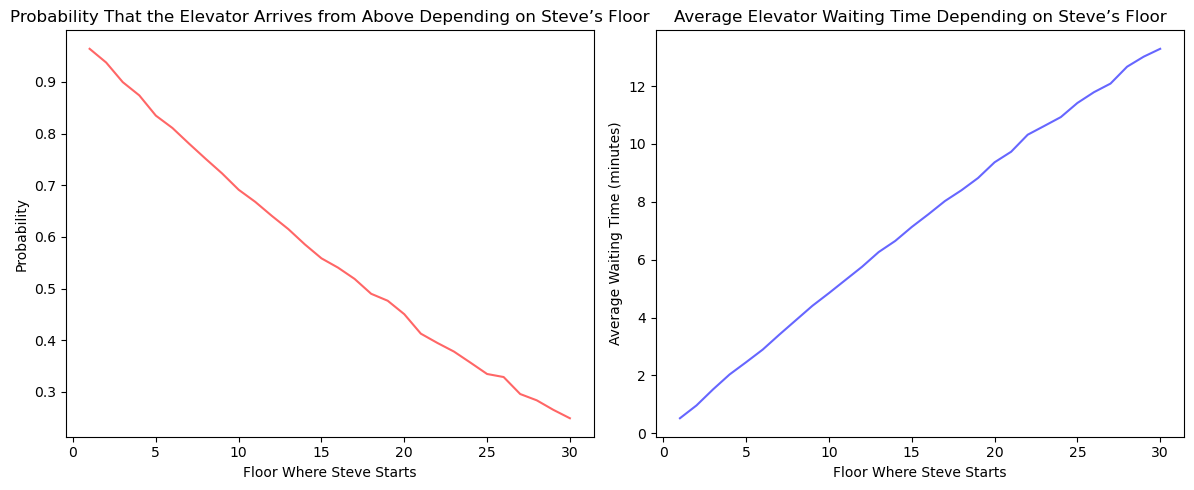

In [25]:
def lift_simulation(steve_floor, experiments=10**4):
    arrival_times = np.random.uniform(0, 60, experiments)
    lift_starts = np.random.uniform(0, 60, experiments)
    time_differences = np.abs(arrival_times - lift_starts) 

 
    above_mask = time_differences > steve_floor
    on_time_mask = time_differences == 0
    within_limit_mask = np.logical_and(~above_mask, ~on_time_mask)

    above_prob = np.sum(above_mask) / experiments
    average_wait_time = np.mean(time_differences[within_limit_mask])

    return above_prob, average_wait_time

floors = 30
floors_array = np.arange(1, floors + 1)

above_probabilities, average_wait_times = np.vectorize(lift_simulation)(floors_array)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(floors_array, above_probabilities, alpha=0.6, color='red')
plt.title('Probability That the Elevator Arrives from Above Depending on Steve’s Floor')
plt.xlabel('Floor Where Steve Starts')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(floors_array, average_wait_times, alpha=0.6, color='blue')
plt.title('Average Elevator Waiting Time Depending on Steve’s Floor')
plt.xlabel('Floor Where Steve Starts')
plt.ylabel('Average Waiting Time (minutes)')

plt.tight_layout()
plt.show()

## Problem 4

From Romashkovo station, 100 little trains depart one after another in the same direction at one-minute intervals. The trains’ initial speeds are independent random variables, uniformly distributed on ([0,1]). When a faster train catches up with a slower one, it reduces its speed to match the slower train’s speed.

After a sufficiently long time, the trains will form several groups, and the number of groups will no longer change. We’ll call this the **final** number of groups. Run 1000 simulations and answer the following:

**a) [5 points]** What is the probability that the **fifth** train is the **leader** of a group?


In [26]:
num_simulations = 1000

def parovoziki():
    speeds = np.random.uniform(0, 1, 100) 
    fifth_parovozik = speeds[4] 
    return fifth_parovozik == max(speeds[1:] * (speeds[1:] > speeds[:-1])) 
                                                                                                                  
fifth_leader = np.sum([parovoziki() for _ in range(num_simulations)])      
probability = fifth_leader / num_simulations 

probability

0.008

**b) [5 points]** On average, into how many final groups do the trains split?

In [27]:
import random
import numpy as np

def parovoziki():
    speeds = np.random.uniform(0, 1, 100)

    while any(speeds[i] > speeds[i - 1] for i in range(1, len(speeds))): 
        for i in range(1, len(speeds)):
            speeds[i] = min(speeds[i], speeds[i - 1])    
    return len(set(speeds))  

total_groups = sum(parovoziki() for _ in range(1000))
average_groups = total_groups / 1000
average_groups

5.182

__в) [10 баллов]__ Нарисуйте усреднённое по симуляциям количество групп в зависимости от времени от старта. По горизонатльной оси — время, прошедшее от старта. По вертикальной оси — среднее число групп. 

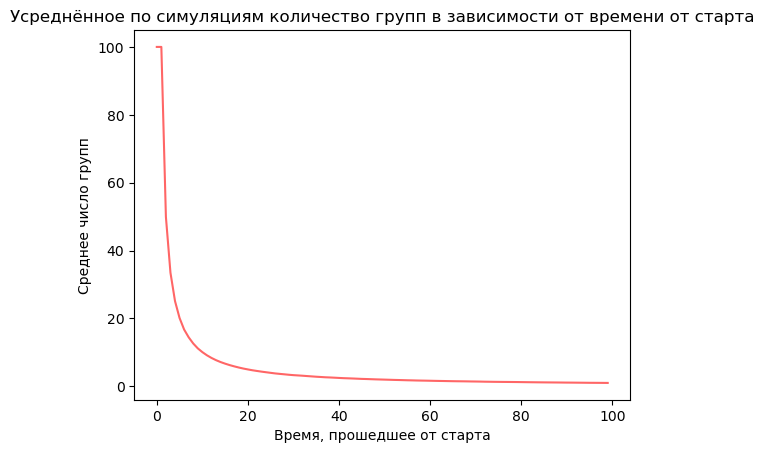

In [12]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 1000
num_trains = 100

start_speeds = np.random.uniform(0, 1, (num_simulations, num_trains))

# время, которое каждый паровозик тратит на прохождение расстояния пропорционального его скорости
travel_time = 1 / start_speeds
# массив для хранения количества групп для каждого времени от старта в каждой симуляции
group_count = np.zeros((num_simulations, num_trains))

for i in range(num_trains):
    # кол-во групп для каждой симуляции в зависимости от времени от старта
    group_count[:, i] = np.sum(travel_time >= i, axis=1)

# среднее кол-во групп для каждого времени от старта
avg_group_count = np.mean(group_count, axis=0)

plt.plot(avg_group_count, color='red', alpha=0.6)
plt.xlabel('Время, прошедшее от старта')
plt.ylabel('Среднее число групп')
plt.title('Усреднённое по симуляциям количество групп в зависимости от времени от старта')
plt.show()
# я столько всего спрашивала у чата, что уже не знаю, кто какую часть написал

__г) [10 баллов]__  Оцените среднее время, в течение которого паровозики разбиваются на финальное число групп. Оцените для этой же случайной величины дисперсию.

У меня больше нет сил понять этот пункт. Спасибо за проверку. 

Авторами данной работы являются индус с ютуба, который объяснил мне большую часть основ, оригинальный  openai chat (у меня есть армянский номер) и, конечно же, ваша верная слуга, Виктория.